# ANN for make simulation and make prediction in physics

# import working liberary

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from openpyxl import Workbook
import openpyxl
from keras.models import load_model

# global variables

In [15]:
# input variable to program
inputFile = 'datasets/data 2017_pi+ 7.7.xlsx'
inputSheetName = 'main'
outputFile = 'out_in3.xlsx'
outputSheetName = 'predicat_in3'
nameFigImg = 'fig_in3.png'


# read data

In [16]:
# Read the data from the CSV file
data = pd.read_excel(inputFile,sheet_name=inputSheetName)
#data = data[data['N part']==337]
# Split the data into input and output variables
#X = data.drop('sqrt', axis=1) #static input for each case : extra data of fiting
#X = data.drop('massno', axis=1) #static input for each case : extra data of fiting
#X = data.drop('output', axis=1)

X = data.drop('Spectrum', axis=1)
#X = data['Pt']
y = data['Spectrum']

# loada saved model

In [17]:

# Load the saved model
model = load_model('NegPion_L9.h5')

# define the model

In [18]:

# Define the model
'''
model = Sequential()
model.add(Dense(3, input_dim=3, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(27, activation='relu'))



model.add(Dense(27, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))
'''

"\nmodel = Sequential()\nmodel.add(Dense(3, input_dim=3, activation='relu'))\nmodel.add(Dense(9, activation='relu'))\nmodel.add(Dense(27, activation='relu'))\n\n\n\nmodel.add(Dense(27, activation='relu'))\nmodel.add(Dense(9, activation='relu'))\nmodel.add(Dense(3, activation='relu'))\nmodel.add(Dense(1, activation='linear'))\n"

# compile the model

In [19]:
# Compile the model with Levenberg-Marquardt optimizer
#optimizer = RMSprop(lr=0.001, rho=0.001)
#model.compile(loss='mean_squared_error', optimizer=optimizer)
#model.compile(loss='mean_squared_error', optimizer='adam')

# train the model

In [20]:
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
#model.fit(X, y, epochs=1000, batch_size=32)


# save current compiled model

In [21]:
# Save the model
#model.save('NegPion_L9.h5')

# make prediction

In [23]:
# Make predictions on new data
#new_data = pd.read_csv('data_pion_20.csv').drop('output', axis=1)
new_data = X
#predictions = model.predict(new_data)
#new_data = new_data.drop('Spectrum', axis=1)

#newX = new_data['Pt']
newX = new_data

print("new_data is : ")
print(new_data)
predictions = model.predict(new_data)
print("predictions is : ")
print(predictions)


new_data is : 
       s  N part     Pt
0    7.7     337  0.275
1    7.7     337  0.325
2    7.7     337  0.375
3    7.7     337  0.425
4    7.7     337  0.475
..   ...     ...    ...
220  7.7      14  1.050
221  7.7      14  1.150
222  7.7      14  1.250
223  7.7      14  1.350
224  7.7      14  1.450

[225 rows x 3 columns]
8/8 [==============================] - 0s 760us/step
predictions is : 
[[103.631096  ]
 [ 95.05721   ]
 [ 86.483315  ]
 [ 77.90942   ]
 [ 69.64295   ]
 [ 63.288994  ]
 [ 56.944233  ]
 [ 50.599464  ]
 [ 44.254715  ]
 [ 37.909958  ]
 [ 73.622475  ]
 [ 60.1166    ]
 [ 47.4271    ]
 [ 34.73758   ]
 [ 22.1304    ]
 [ 12.533143  ]
 [  4.3431425 ]
 [  1.0326339 ]
 [  0.90867573]
 [  0.90867573]
 [  0.90867573]
 [  0.90867573]
 [  0.90867573]
 [  0.90867573]
 [  0.90867573]
 [  0.90867573]
 [ 86.587364  ]
 [ 78.01347   ]
 [ 69.7237    ]
 [ 63.36597   ]
 [ 57.021233  ]
 [ 50.676476  ]
 [ 44.331722  ]
 [ 37.98696   ]
 [ 31.642204  ]
 [ 25.305544  ]
 [ 60.193615  ]
 [ 47.5040

# draw 

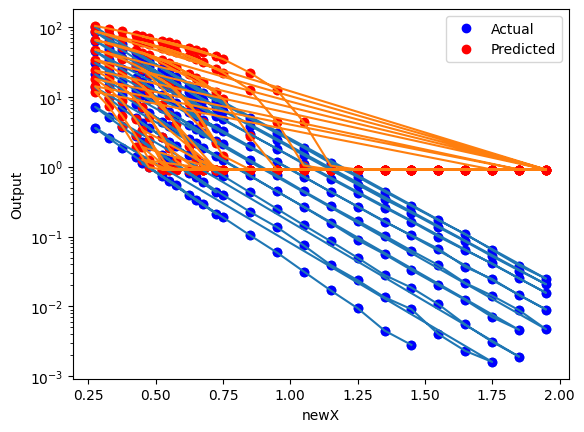

<Figure size 640x480 with 0 Axes>

In [24]:

# for drawing in 2d i choose Pt as x-axis
xg = new_data['Pt']


# Plot the data and predictions
plt.plot(xg, y, 'bo', label='Actual')
plt.plot(xg, predictions, 'ro', label='Predicted')
plt.xlabel('newX')
plt.ylabel('Output')
plt.legend()

plt.semilogy(xg,  y)
plt.semilogy(xg, predictions)

plt.scatter(xg, y)
plt.scatter(xg, predictions)


plt.show()
plt.savefig(nameFigImg)

# write output to excel 

In [25]:

# Write predictions and plot data to Excel file
#output = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten()})
#outputpredicat = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
outputpredicat = pd.DataFrame({ 'Pt': xg.values.flatten(),'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
# output is data frame

# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    #output.to_excel(writer, sheet_name='output', index=False)


# print model summery 

In [26]:

print("End")
print(model.summary())

End
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 9)                 36        
                                                                 
 dense_2 (Dense)             (None, 27)                270       
                                                                 
 dense_3 (Dense)             (None, 27)                756       
                                                                 
 dense_4 (Dense)             (None, 9)                 252       
                                                                 
 dense_5 (Dense)             (None, 3)                 30        
                                                                 
 dense_6 (Dense)             (None, 1)              